In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
url = "https://drive.usercontent.google.com/u/0/uc?id=1Rr205lCQRnqRQRBDHsvzILxcQZnsFQ9x&export=download"
weather = pd.read_csv(url)

Task 1

<ipython-input-22-c0ce119978ca>:10: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  weather = weather.interpolate(method='linear')
<ipython-input-22-c0ce119978ca>:11: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  weather['Formatted Date'] = pd.to_datetime(weather['Formatted Date'])


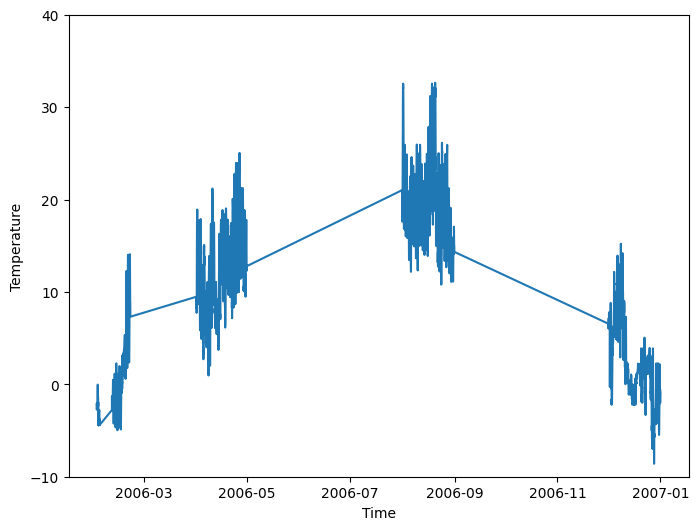

In [22]:
weather.dropna(inplace=True)
weather.drop_duplicates(inplace=True)
weather = weather[weather['Temperature (C)']> - 10]
weather = weather[weather['Temperature (C)']<40]
weather = weather[weather["Apparent Temperature (C)"]> - 50]
weather = weather[weather["Apparent Temperature (C)"]<50]
weather = weather[weather["Pressure (millibars)"]>1000]
weather = weather[weather["Wind Bearing (degrees)"] >20]
weather.sort_values(by='Formatted Date', inplace=True)
weather = weather.interpolate(method='linear')
weather['Formatted Date'] = pd.to_datetime(weather['Formatted Date'])
weather.set_index('Formatted Date', inplace=True)
temperature = weather['Temperature (C)']
time = weather.index
fig, line = plt.subplots(figsize=(8,6))
line.plot(time, temperature)
line.set_ylim(-10.0,40.0)
line.set_xlabel('Time')
line.set_ylabel('Temperature')
plt.show()
#

Task_1

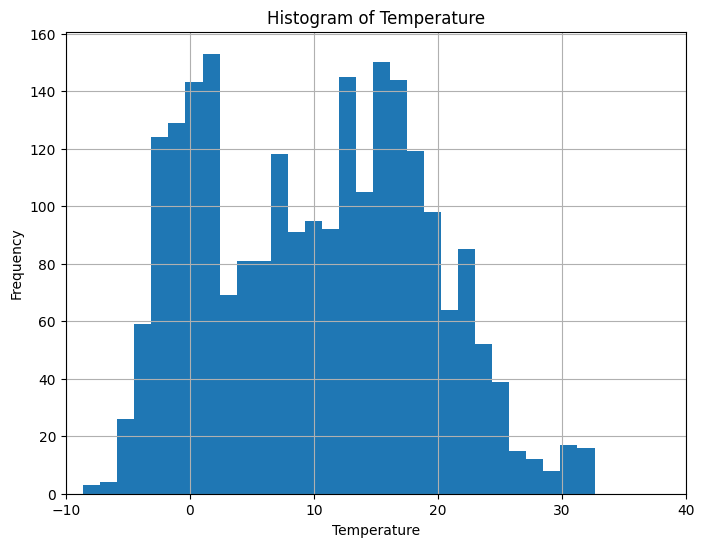

In [23]:
weather['Temperature (C)'].hist(bins=30, figsize=(8,6))
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.xlim(-10.0,40.0)
plt.show()

Task 1

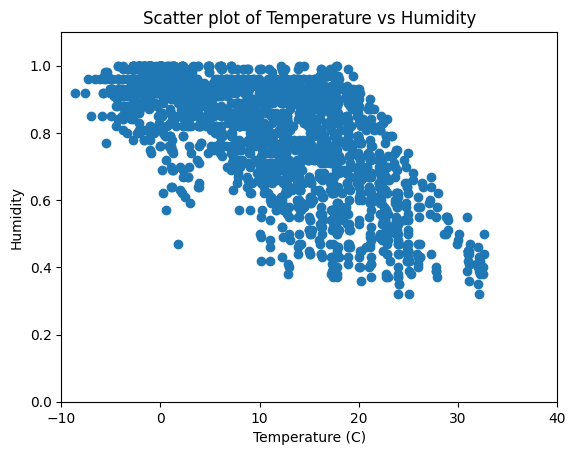

In [24]:
plt.scatter(weather['Temperature (C)'], weather['Humidity'])
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.title('Scatter plot of Temperature vs Humidity')
plt.xlim(-10.0,40.0)
plt.ylim(0.0,1.1)
plt.show()

Task_1

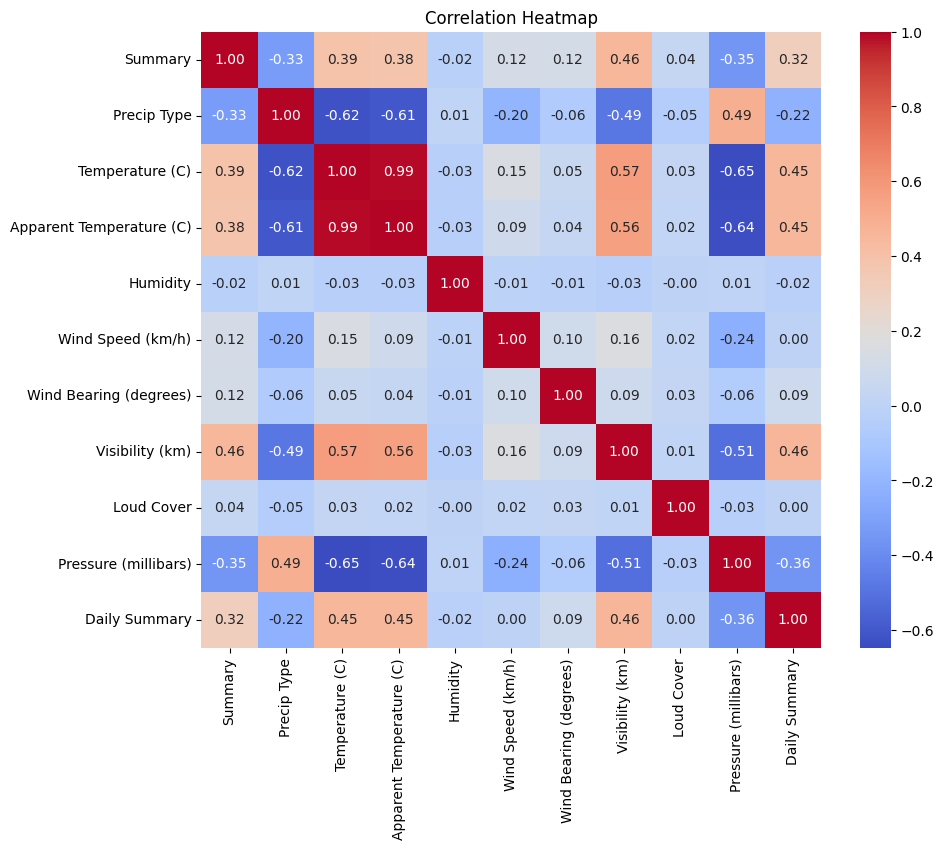

In [25]:
le = LabelEncoder()
weather['Summary'] = le.fit_transform(weather['Summary'])
weather['Precip Type'] = le.fit_transform(weather['Precip Type'])
weather['Daily Summary'] = le.fit_transform(weather['Daily Summary'])
correlation_matrix = weather.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()